всем привет

In [89]:
print('hello, world!')

hello, world!


In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

# задание 1

Условие
1. Реализовать генератор схемы Бернулли с заданной вероятностью успеха $p$. На
основе генератора схемы Бернулли построить датчик биномиального распределения.
2. Реализовать генератор геометрического распределения; проверить для данного
распределения свойство отсутствия памяти.
3. Промоделировать игру в орлянку: бесконечную последовательность независимых испытаний Бернулли с бросанием “правильной” (честной, p = 0.5) монеты.
Величина “выигрыша” $S_n$ определяется как сумма по $n$ испытаниям значений 1
и −1 в зависимости от выпавшей стороны монеты. Проиллюстрировать в виде
ломаной поведение нормированной суммы $Y(i) = \frac{S_i}{\sqrt{n}}$
как функцию от номера испытания i для отдельно взятой траектории. Дать теоретическую оценку для значения $Y(n)$ при $n \to ∞$

## 1.1

In [91]:
def bernoulli_trial(p: float) -> int:
    if not (0 <= p <= 1):
        raise ValueError("p должна быть в пределах [0, 1]")
    
    if np.random.random() < p:
        return 1 
    else:
        return 0

def binomial_generator(n: int, p: float) -> int:
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n должно быть положительным целым числом")
    if not (0 <= p <= 1):
        raise ValueError("p должна быть в пределах [0, 1]")
    
    successes = 0
    for _ in range(n):
        successes += bernoulli_trial(p)
    return successes

In [92]:
n = 50
p = 0.5

for _ in range(n):
    bernoulli_sample = bernoulli_trial(p)
    print(bernoulli_sample, end=' ')

print()

p = 0.9
binomial_sample = binomial_generator(n, p)
print(f"Количество успехов в {n} испытаниях: {binomial_sample}")

1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 
Количество успехов в 50 испытаниях: 47


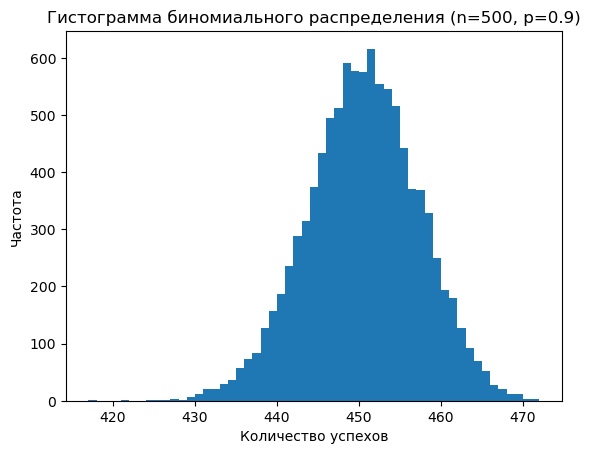

In [93]:
num_samples = 10000
n = 500

binomial_samples = [binomial_generator(n, p) for _ in range(num_samples)]

plt.hist(binomial_samples, bins=range(min(binomial_samples), max(binomial_samples) + 1))
plt.title(f"Гистограмма биномиального распределения (n={n}, p={p})")
plt.xlabel("Количество успехов")
plt.ylabel("Частота")
plt.savefig('1_1_4.eps', format='eps')
plt.show()

## 1.2



Формула для генерации геометрически распределенной случайной величины $X$:
$$ X = \frac{\log(U)}{\log(1 - p)} , $$
где $U \sim U(0, 1)$ — равномерно распределённая случайная величина;


In [94]:
def geomrnd(p, n):
    if not (0 < p <= 1):
        raise ValueError("p должна быть в пределах [0, 1]")
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n должно быть положительным целым числом")
    
    uniform_rand = np.random.rand(n)
    return np.log(uniform_rand) / np.log(1 - p)    

def memoryless_property(p, n, k):
    # Генерация выборки
    geom_sample = geomrnd(p, n)
    geom_sample_k= geom_sample[geom_sample > k] - k

    # Построение гистограмм
    bins = np.arange(1, max(geom_sample.max(), geom_sample_k.max()) + 1.5) - 0.5

    plt.figure(figsize=(12, 6))
    
    plt.hist(geom_sample, bins=bins, alpha=0.5, label="Оригинальная выборка", density=True)
    plt.hist(geom_sample_k, bins=bins, alpha=0.5, label=f"Условная выборка (X > {k})", density=True)
    
    plt.xlabel("Значение")
    plt.ylabel("Относительная частота")
    plt.title("Свойство отсутствия памяти геометрического распределения")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, np.percentile(geom_sample, 99.9))
    plt.savefig('1_2_1.eps', format='eps')
    plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


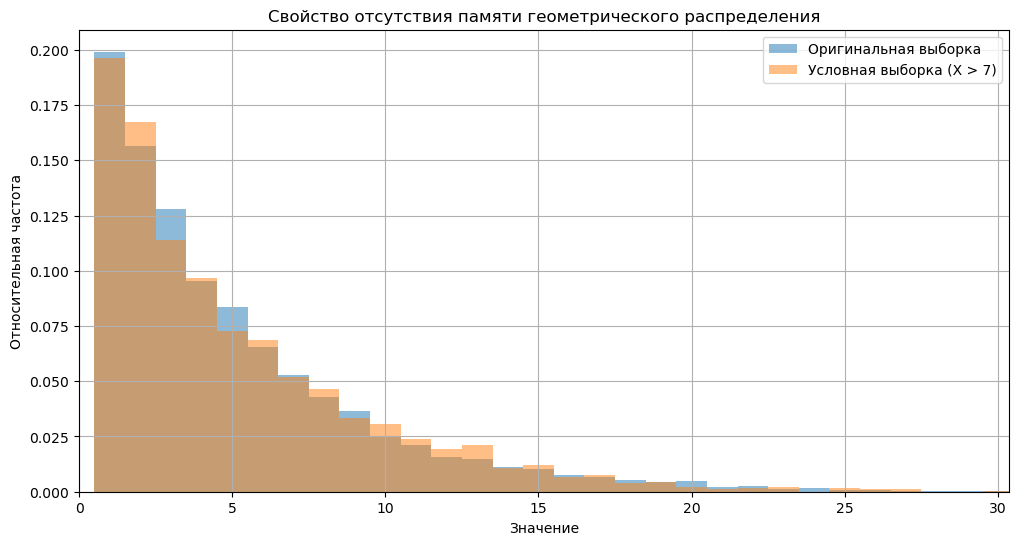

In [95]:
p = 0.2
n = 10000

# для проверки свойства отсутствия памяти
k = 7

memoryless_property(p, n, k)


## 1.3

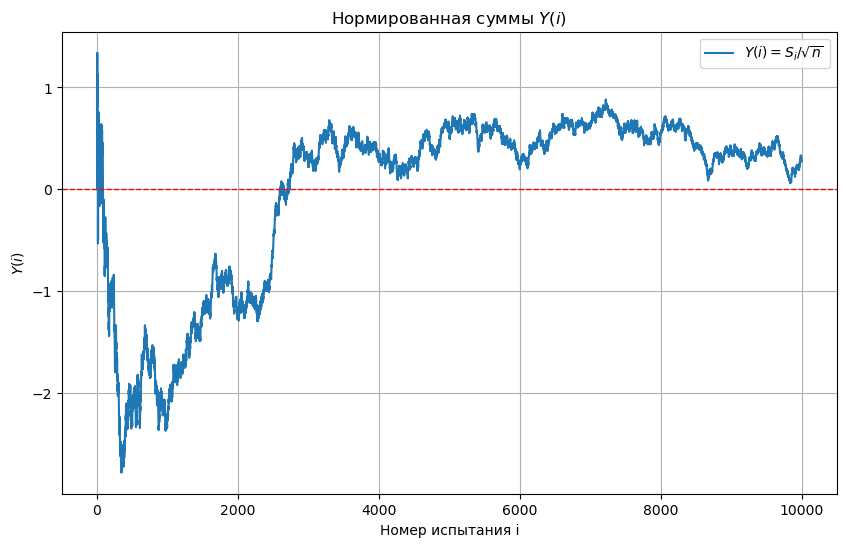

In [96]:
n = 10000
p = 0.5

trials = [1 if bernoulli_trial(p) == 1 else -1 for _ in range(n)]

# сумма выигрышей S_i
S = np.cumsum(trials)

# нормированная сумма Y(i)
Y = S / np.sqrt(np.arange(1, n + 1))

plt.figure(figsize=(10, 6))
plt.plot(Y, label='$Y(i) = S_i / \\sqrt{n}$')
plt.xlabel('Номер испытания i')
plt.ylabel('$Y(i)$')
plt.title('Нормированная суммы $Y(i)$')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.legend()
plt.grid()
plt.show()


# задание 2

Условие

1. Построить датчик сингулярного распределения, имеющий в качестве функции распределения канторову лестницу. С помощью критерия Колмогорова убедиться в корректности работы датчика.
2. Для канторовых случайных величин с помощью критерия Смирнова проверить свойство симметричности относительно $\frac{1}{2}$ ($X$ и $1 - X$ распределены одинаково) и свойство самоподобия относительно деления на 3 (условное распределение Y при условии $Y \in [0, 1/3]$ совпадает с распределением $Y/3$).
3. Рассчитать значения математического ожидания и дисперсии для данного распределения. Сравнить теоретические значения с эмпирическими (для различных объемов выборок), проиллюстрировать сходимость эмпирических значений к теоретическим.

## 2.1

In [97]:
def singular_distribution(n=1, m=20):
    if n <= 0:
        raise ValueError("n должно быть больше 0")
    
    size = (n, m)
    ksi = np.array([[binomial_generator(1, 0.5) * 2 for _ in range(m)] for _ in range(n)])
    
    powers_of_three = 3.0 ** -(np.arange(1, m + 1))
    powers_of_two = 2.0 ** -(np.arange(1, m + 1))

    point = np.sum(ksi * powers_of_three, axis=1)
    Cx = np.sum((ksi / 2) * powers_of_two, axis=1)
    
    return point, Cx


Критерий Колмогорова:

1. Вычисляется максимальное отклонение:
$$
    D = \max |C_{\text{emp}}(x) - C(x)|.
$$
2. Используется статистика $ F_k $ для вычисления $ p $-value:
$$
    F_k = 1 + 2 \sum_{k=1}^\infty (-1)^{k} e^{-2k^2 D^2},    
$$
то есть:
$$
    F_k = 1 - 2 \sum_{k=1}^\infty (-1)^{k-1} e^{-2k^2 D^2},    
    p = 1 - F_k.
$$

Решение:
1. Если $ p > \alpha $, гипотеза принимается (расхождения несущественны).
2. Если $ p \leq \alpha $, гипотеза отвергается (расхождения значимы).


In [98]:
def Kolmogorov_Smirnov(x, Cx, C_emp):
    alpha = 0.1
    n = 100
    k_values = np.arange(1, n + 1)

    max_deviation = np.max(np.abs(Cx - C_emp))
    series_terms = (-1) ** (k_values - 1) * np.exp(-2 * (k_values ** 2) * (max_deviation ** 2))
    Fk = 1 - 2 * np.sum(series_terms)
    
    p = 1 - Fk
    p = max(0, min(1, p))
    passed = p > alpha
    print(f"p-value: {p:.5f}, Гипотеза принимается: {'Да' if passed else 'Нет'}")
    return p, passed

def Kolmogorov_Test(Cx, C_emp):
    x = np.sqrt(np.size(Cx))
    return Kolmogorov_Smirnov(x, Cx, C_emp)

def Smirnov_Test(f1, f2):
    alpha = 0.01
    n = np.size(f1)
    m = np.size(f2)
    x = np.sqrt(n * m / (n + m))
    return Kolmogorov_Smirnov(x, f1, f2)

p-value: 0.28188, Гипотеза принимается: Да


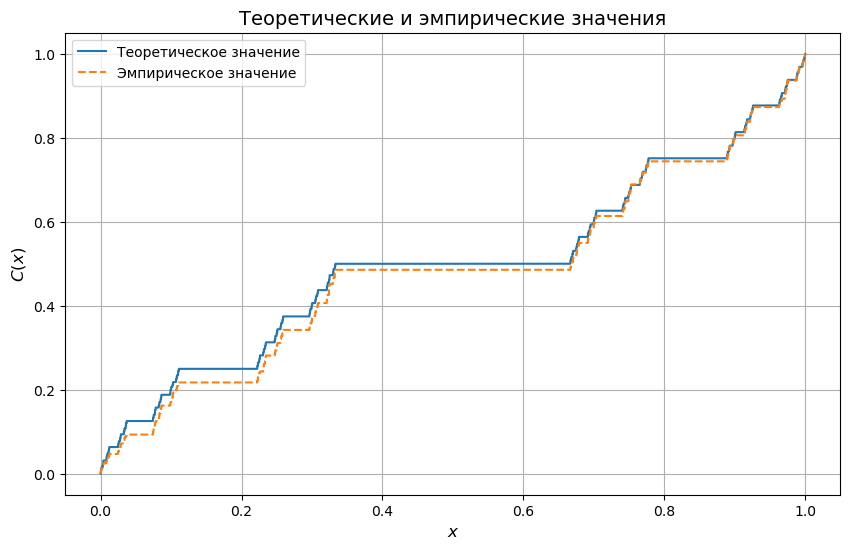

In [99]:
n_samples = 1000
m_steps = 20

X, Cx = singular_distribution(n=n_samples, m=m_steps)
X_sorted = np.sort(X)
Cx_sorted = np.sort(Cx)

C_empirical = np.arange(1, n_samples + 1) / n_samples

Kolmogorov_Test(Cx, C_empirical)

plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.step(X_sorted, Cx_sorted, label='Теоретическое значение')
plt.step(X_sorted, C_empirical, '--', label='Эмпирическое значение')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$C(x)$', fontsize=12)
plt.title('Теоретические и эмпирические значения', fontsize=14)
plt.legend()
plt.grid()
plt.show()

## 2.2

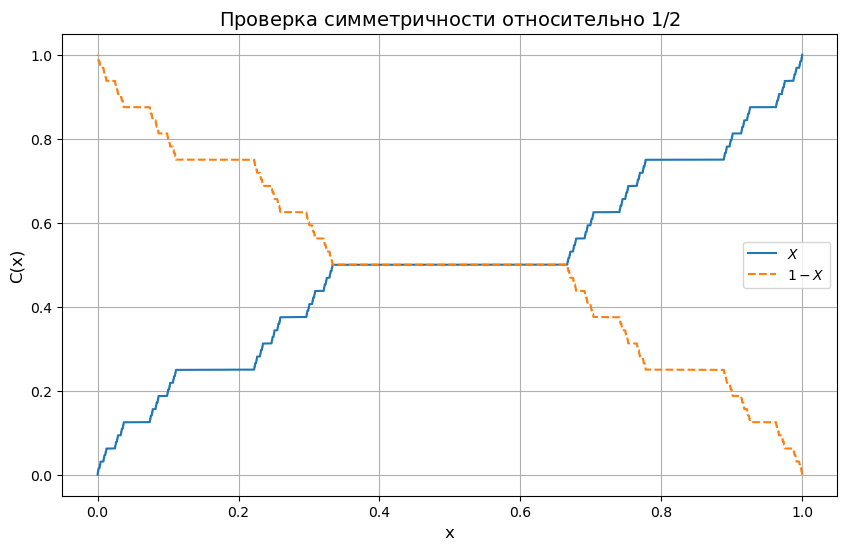

In [100]:
n_samples = 10000
X, Y = np.sort(singular_distribution(n=n_samples))
X_1 = 1-np.sort(X)

plt.figure(figsize=(10, 6)) 
plt.plot(X, Y, label="$X$")
plt.plot(X_1, Y, '--', label="$1-X$")
plt.xlabel("x", fontsize=12)
plt.ylabel("C(x)", fontsize=12)
plt.title("Проверка симметричности относительно $1/2$", fontsize=14)
plt.legend()
plt.grid()
plt.show()

Проверка самоподобия относительно деления на 3:
p-value: 0.95818, Гипотеза принимается: Да


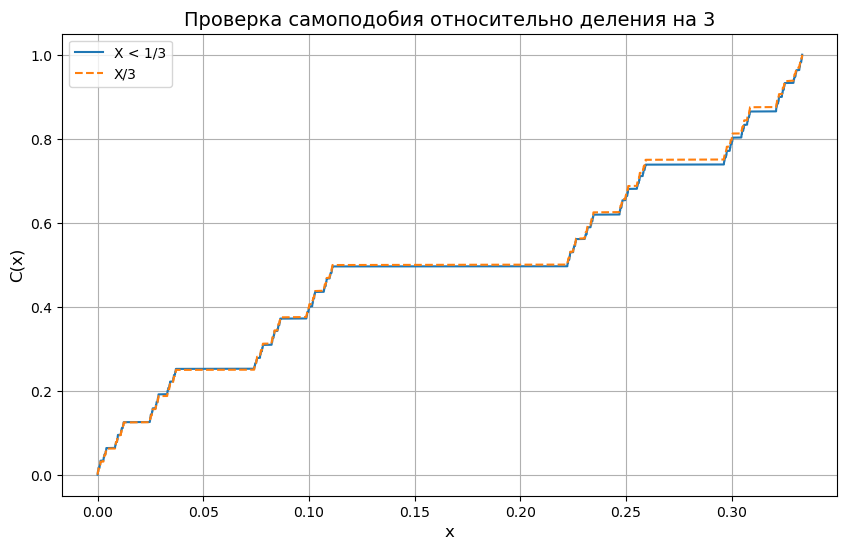

In [101]:
X1 = X[np.where(X < 1 / 3)]
n_new = np.size(X1)

Y1 = (np.arange(1, n_new + 1)) / n_new 

X2 = X / 3  
Y2_interp = np.interp(X1, np.sort(X2), Y)  

print("Проверка самоподобия относительно деления на 3:")
p_value, passed = Smirnov_Test(Y1, Y2_interp)

plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.plot(X1, Y1, label="X < 1/3")
plt.plot(X1, Y2_interp, '--', label="X/3")
plt.xlabel("x", fontsize=12)
plt.ylabel("C(x)", fontsize=12)
plt.title("Проверка самоподобия относительно деления на 3", fontsize=14)
plt.legend()
plt.grid()
plt.show()


## 2.3

Теоретическое математическое ожидание и дисперсия для заданного сингулярного распределения:
$$
\mathbb{E}[X] = \frac{1}{2}, \quad \text{Var}(X) = \frac{1}{8}.
$$


In [102]:
for n in [10, 100, 1000, 10000]:
  X = singular_distribution(n, m=50) 
  print(n, np.mean(X), np.var(X))

10 0.5553261485040061 0.06958846629476934
100 0.5559813522040361 0.10131664227481106
1000 0.4940092646866533 0.10811494949000618
10000 0.5017717462928998 0.10389829891465666


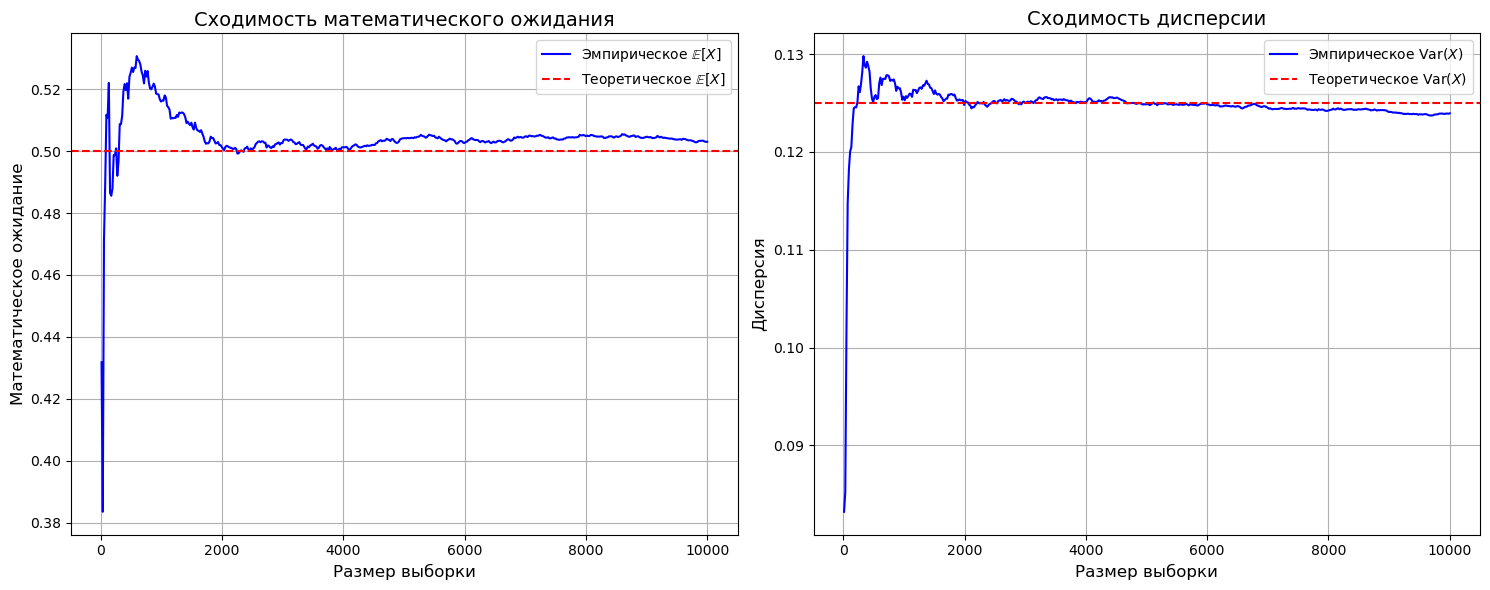

In [103]:
th_mean = 0.5
th_var = 1 / 8

grid = np.linspace(10, 10000, 500, dtype=int)

max_n = np.max(grid)
X = singular_distribution(n=max_n, m=50) 

emp_means = [np.mean(X[0][:n]) for n in grid] 
emp_var = [np.var(X[0][:n], ddof=0) for n in grid]

plt.figure(figsize=(15, 6)) 

plt.subplot(1, 2, 1) 
plt.plot(grid, emp_means, label="Эмпирическое $\\mathbb{E}[X]$", color="blue")
plt.axhline(th_mean, color="red", linestyle="--", label="Теоретическое $\\mathbb{E}[X]$")
plt.title("Сходимость математического ожидания", fontsize=14)
plt.xlabel("Размер выборки", fontsize=12)
plt.ylabel("Математическое ожидание", fontsize=12)
plt.legend(fontsize=10)
plt.grid()

plt.subplot(1, 2, 2) 
plt.plot(grid, emp_var, label="Эмпирическое $\\text{Var}(X)$", color="blue")
plt.axhline(th_var, color="red", linestyle="--", label="Теоретическое $\\text{Var}(X)$")
plt.title("Сходимость дисперсии", fontsize=14)
plt.xlabel("Размер выборки", fontsize=12)
plt.ylabel("Дисперсия", fontsize=12)
plt.legend(fontsize=10)
plt.grid()

plt.tight_layout()
plt.show()


# задание 3

Условие:
1. Построить датчик экспоненциального распределения. Проверить для данного распределения свойство отсутствия памяти.

2. Пусть $X_1, \ldots, X_n$ — независимые экспоненциально распределенные случайные величины с параметрами $\lambda_1, \ldots, \lambda_n$. Найти распределение случайной величины $Y = \min(X_1, \ldots, X_n)$.

3. На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.

4. Построить датчик пуассоновского распределения как предел биномиального распределения. Убедиться в корректности построенного датчика при помощи критерия $\chi^2$ Пирсона.

5. Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные координаты (преобразование Бокса-Мюллера). Проверить при помощи $t$-критерия Стьюдента равенство математических ожиданий, а при помощи критерия Фишера — равенство дисперсий.


## 3.1 
Построить датчик экспоненциального распределения. Проверить для данного распределения свойство отсутствия памяти.


In [104]:
def exp_dist(lam, n):
    if lam <= 0:
        raise ValueError("Параметр λ должен быть положительным.")
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n должно быть положительным целым числом.")
    
    return -np.log(np.random.rand(n)) / lam


In [105]:
def memoryless_exp(lam, n, t):

    exp = exp_dist(lam, n)
    exp_t = exp[exp > t] - t

    exp_s = np.sort(exp)
    ecdf = np.arange(1, len(exp_s) + 1) / len(exp_s)

    exp_t_s = np.sort(exp_t)
    ecdf_sh = np.arange(1, len(exp_t_s) + 1) / len(exp_t_s)

    plt.figure(figsize=(10, 6))

    plt.step(exp_s, ecdf, label="Распределение $X$")
    plt.step(exp_t_s, ecdf_sh, linestyle="--", label=f"Распределение $X - t | X > t$")

    plt.xlabel("x")
    plt.ylabel("Функция распределения")
    plt.title("Проверка свойства отсутствия памяти")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


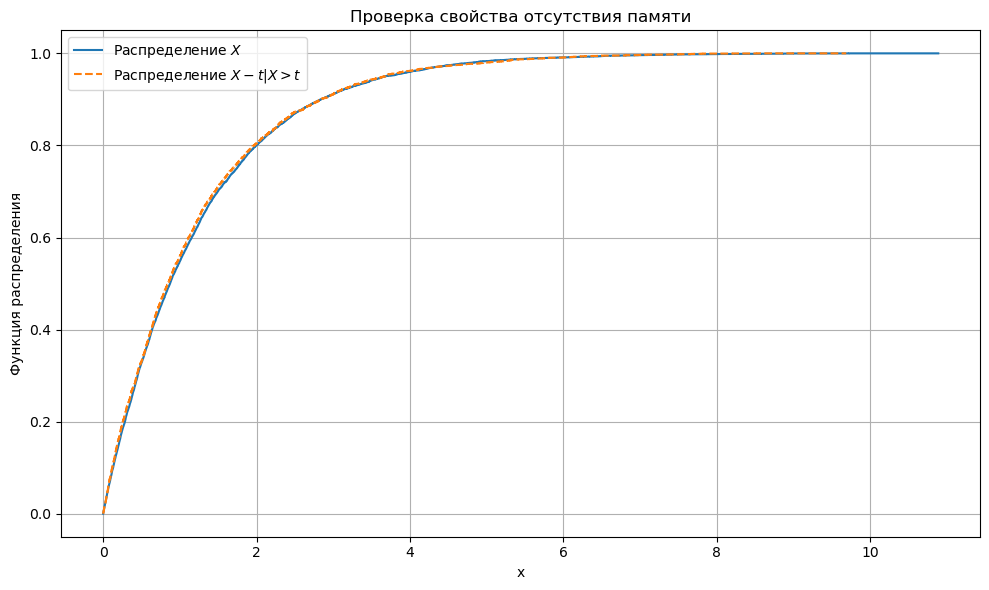

In [106]:
lam = 0.8
n = 10000
# для свойства отсутствия памяти
t = 1.2

memoryless_exp(lam, n, t)

## 3.2
Пусть $X_1, \ldots, X_n$ — независимые экспоненциально распределенные случайные величины с параметрами $\lambda_1, \ldots, \lambda_n$. Найти распределение случайной величины $Y = \min(X_1, \ldots, X_n)$.

Распределение минимума независимых экспоненциальных величин
Пусть $ X_1, X_2, \ldots, X_n $ — независимые экспоненциально распределённые случайные величины с параметрами $ \lambda_1, \lambda_2, \ldots, \lambda_n.$

Функция распределения экспоненциальной случайной величины $ X_i $ имеет вид:
$$
F_{X_i}(x) =
\begin{cases} 
1 - e^{-\lambda_i x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
$$

Функция распределения случайной величины $ Y = \min(X_1, X_2, \ldots, X_n) $ равна:
$$
F_Y(y) = P(Y \leq y) = 1 - P(Y > y) = 1 - P(X_1 > y, X_2 > y, \ldots, X_n > y).
$$

Так как $ X_1, X_2, \ldots, X_n $ независимы, имеем:
$$
P(Y > y) = P(X_1 > y) \cdot P(X_2 > y) \cdot \ldots \cdot P(X_n > y).
$$

Вероятность для экспоненциального распределения: $ P(X_i > y) = e^{-\lambda_i y}.$
Тогда:
$$
P(Y > y) = e^{-\lambda_1 y} \cdot e^{-\lambda_2 y} \cdot \ldots \cdot e^{-\lambda_n y} = e^{-(\lambda_1 + \lambda_2 + \ldots + \lambda_n) y}.
$$

Подставляя в функцию распределения $ F_Y(y):$
$$
F_Y(y) = 1 - e^{-(\lambda_1 + \lambda_2 + \ldots + \lambda_n) y}, \quad y \geq 0.
$$

Таким образом, $ Y $ имеет экспоненциальное распределение с параметром $ \lambda = \lambda_1 + \lambda_2 + \ldots + \lambda_n.$


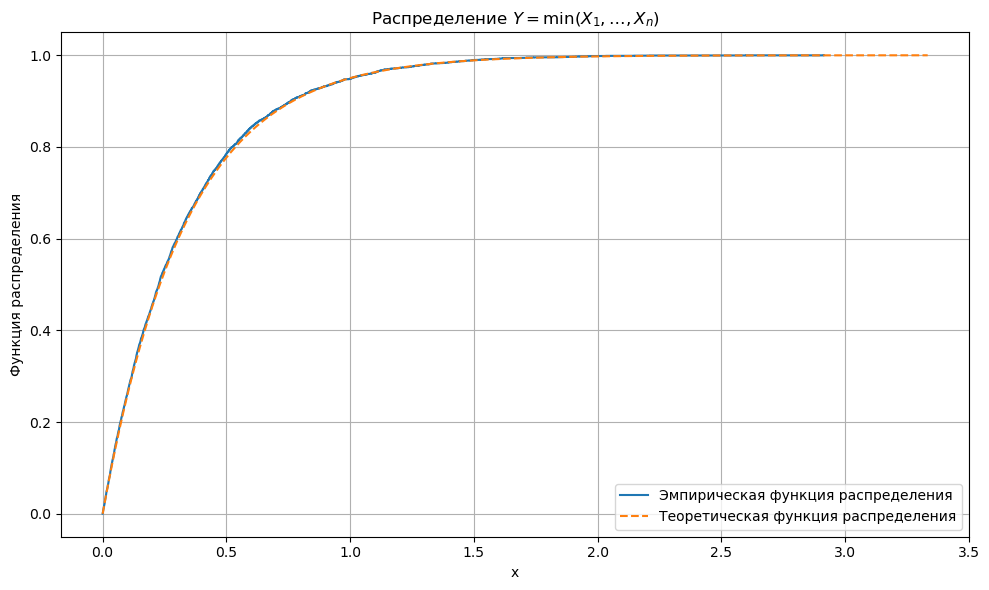

In [107]:
lambdas = [0.5, 1.0, 1.5]
n = 5000

total_lambda = sum(lambdas)
data = -np.log(np.random.rand(n)) / total_lambda

x = np.linspace(0, 10 / total_lambda, 1000)
cdf = 1 - np.exp(-total_lambda * x)

sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(10, 6))
plt.step(sorted_data, ecdf, label="Эмпирическая функция распределения", where="post")
plt.plot(x, cdf, label="Теоретическая функция распределения", linestyle="--")
plt.xlabel("x")
plt.ylabel("Функция распределения")
plt.title("Распределение $Y = \\min(X_1, \\ldots, X_n)$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## 3.3 
На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.


1. Основные характеристики процесса Пуассона:
$N(t) \sim \text{Poisson}(\lambda t),$
где:
- $\lambda$— интенсивность процесса (среднее число событий в единицу времени),
- $t$ — время наблюдения.

2. Время между событиями:
$T_i \sim \text{Exp}(\lambda),$
где $T_i$ — время между двумя последовательными событиями.

3. Распределение количества событий:
$P(N(t) = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}, \quad k = 0, 1, 2, \ldots$


In [108]:
def poisson_dist(lam, t, n):
    if lam <= 0:
        raise ValueError("λ должна быть положительной")
    if t <= 0:
        raise ValueError("Время t должно быть положительным")
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n должно быть положительным целым числом")
    
    poisson_samples = []
    
    for _ in range(n):
        total_time = 0
        count = 0
        while total_time < t:
            total_time += exp_dist(lam, 1)[0]
            if total_time < t:
                count += 1
        poisson_samples.append(count)
    
    return np.array(poisson_samples)

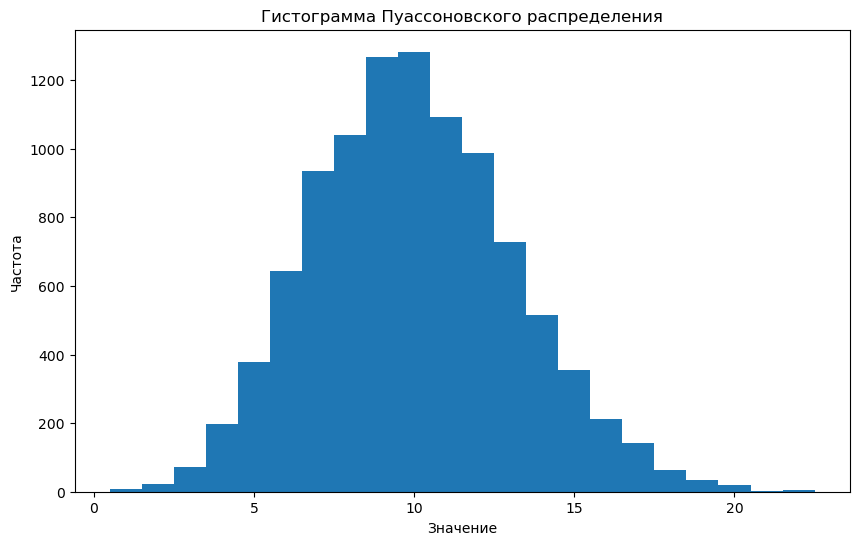

In [109]:
lam = 2.0
t = 5.0
n = 10000  

poisson_samples = poisson_dist(lam, t, n)

plt.figure(figsize=(10, 6))
plt.hist(poisson_samples, bins=np.arange(poisson_samples.min(), poisson_samples.max() + 1) - 0.5)
plt.title("Гистограмма Пуассоновского распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

## 3.4
Построить датчик пуассоновского распределения как предел биномиального распределения. Убедиться в корректности построенного датчика при помощи критерия $\chi^2$ Пирсона.

Распределение биномиальной случайной величины:
$$
P(X = k) = C_n^k p^k (1 - p)^{n-k}, \quad k = 0, 1, 2, \dots, n,
$$

Биномиальное распределение при $ n \to \infty, \, p \to 0, \, n \cdot p = \lambda $:
$$
P(X = k) \approx \frac{\lambda^k e^{-\lambda}}{k!}, \quad \lambda = n \cdot p.
$$


In [110]:
def poisson_from_binomial(n_trials, p, size):
    samples = [binomial_generator(n_trials, p) for _ in range(size)]
    return np.array(samples)

def chi_square(sample, lambda_param):
    unique, counts = np.unique(sample, return_counts=True)
    observed_freq = counts
    
    expected_freq = [len(sample) * (np.exp(-lambda_param) * lambda_param**k / np.math.factorial(k)) for k in unique]
    expected_freq = np.array(expected_freq)
    expected_freq *= observed_freq.sum() / expected_freq.sum()
    
    chi2_stat = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df=len(unique) - 1)
    
    return chi2_stat, p_value


Критерий согласия хи-квадрат

Статистика критерия:
$$
\chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i},
$$
где:
- $ O_i $ — наблюдаемая частота,
- $ E_i $ — ожидаемая частота,
- $ k $ — число уникальных значений в выборке.

$ p $-значение:
$$
p = 1 - F_{\chi^2}(\chi^2, \nu),
$$
где:
- $ F_{\chi^2} $ — функция распределения хи-квадрат,
- $ \nu = k - 1 $ — число степеней свободы.

Статистика χ²: 9.06
p-value: 0.6980
Гипотеза о соответствии Пуассоновскому распределению не отвергается (p > 0.05).


/var/folders/tz/9rr3c4v11snf853mdqj9c_3r0000gn/T/ipykernel_30426/3640931920.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  expected_freq = [len(sample) * (np.exp(-lambda_param) * lambda_param**k / np.math.factorial(k)) for k in unique]
/var/folders/tz/9rr3c4v11snf853mdqj9c_3r0000gn/T/ipykernel_30426/732262603.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson_probs = [np.exp(-lambda_param) * lambda_param**k / np.math.factorial(k) for k in x]


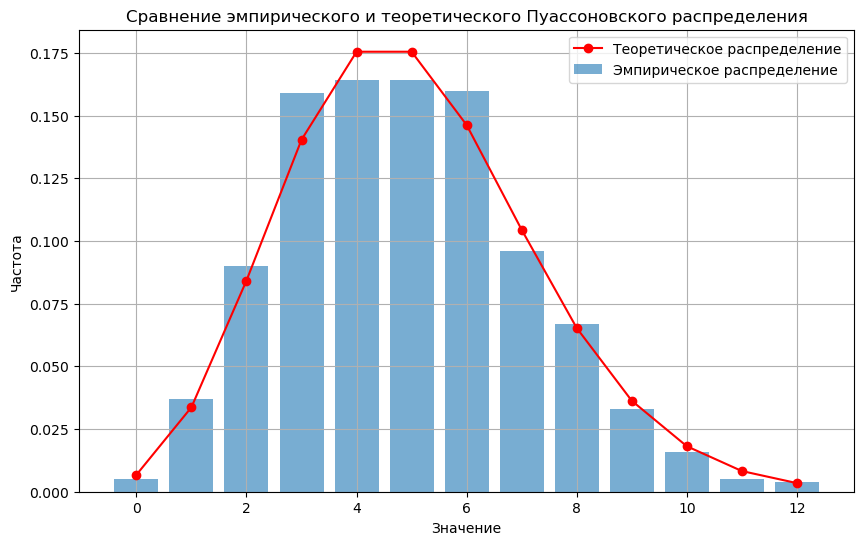

In [111]:
n_trials = 1000
p = 0.005
size = 1000
lambda_param = n_trials * p

poisson_sample = poisson_from_binomial(n_trials, p, size)
chi2_stat, p_value = chi_square(poisson_sample, lambda_param)

print(f"Статистика χ²: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Гипотеза о соответствии Пуассоновскому распределению не отвергается (p > 0.05).")
else:
    print("Гипотеза о соответствии Пуассоновскому распределению отвергается (p <= 0.05).")

plt.figure(figsize=(10, 6))

values, counts = np.unique(poisson_sample, return_counts=True)
plt.bar(values, counts / size, alpha=0.6, label="Эмпирическое распределение")

x = np.arange(0, max(values) + 1)
poisson_probs = [np.exp(-lambda_param) * lambda_param**k / np.math.factorial(k) for k in x]
plt.plot(x, poisson_probs, 'o-', label="Теоретическое распределение", color='red')

plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Сравнение эмпирического и теоретического Пуассоновского распределения")
plt.legend()
plt.grid(True)
plt.show()


## 3.5
Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные координаты (преобразование Бокса-Мюллера). Проверить при помощи $t$-критерия Стьюдента равенство математических ожиданий, а при помощи критерия Фишера — равенство дисперсий.

Метод Бокса-Мюллера. Генерация стандартного нормального распределения:
$$
Z_1 = \sqrt{-2 \ln U_1} \cos(2 \pi U_2), \quad Z_2 = \sqrt{-2 \ln U_1} \sin(2 \pi U_2),
$$
где $ U_1, U_2 \sim \text{Uniform}(0, 1) $.

In [112]:
def box_muller(size):
    if size <= 0:
        raise ValueError('n должно быть положительным')
    u1 = np.random.rand(size // 2)
    u2 = np.random.rand(size // 2)
    
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    
    z1 = r * np.cos(theta)
    z2 = r * np.sin(theta)
    
    return np.concatenate([z1, z2])



$ t $-критерий Стьюдента

Гипотезы:
$
H_0: \mu = \mu_0, \quad H_1: \mu \neq \mu_0.
$

Статистика:
$$
t = \frac{\bar{X} - \mu_0}{S / \sqrt{n}},
$$
где:
$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i, \quad S = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2}.
$


In [113]:
def t_test(data, expected_mean=0):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    
    t_stat = (sample_mean - expected_mean) / (sample_std / np.sqrt(n))
    p_value = 2 * min(np.sum(data > sample_mean - t_stat) / n, 1)
    
    return t_stat, p_value


Критерий Фишера

Гипотезы:
$
H_0: \sigma_1^2 = \sigma_2^2, \quad H_1: \sigma_1^2 \neq \sigma_2^2.
$

Статистика:
$$
F = \frac{\max(S_1^2, S_2^2)}{\min(S_1^2, S_2^2)},
$$
где:
$$
S_1^2 = \frac{1}{n_1 - 1} \sum_{i=1}^{n_1} (X_{1i} - \bar{X}_1)^2, \quad S_2^2 = \frac{1}{n_2 - 1} \sum_{i=1}^{n_2} (X_{2i} - \bar{X}_2)^2.
$$

Это формула для практического применения, где дисперсии оцениваются по выборке.

In [114]:
def f_test(data1, data2):
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    
    f_stat = var1 / var2 if var1 > var2 else var2 / var1
    p_value = 2 * min(np.sum(data1 > var2) / len(data1), 1)
    
    return f_stat, p_value

t-критерий Стьюдента: t-статистика = -0.7906, p-значение = 0.4287
критерий Фишера: F-статистика = 1.0025, p-значение = 0.3179


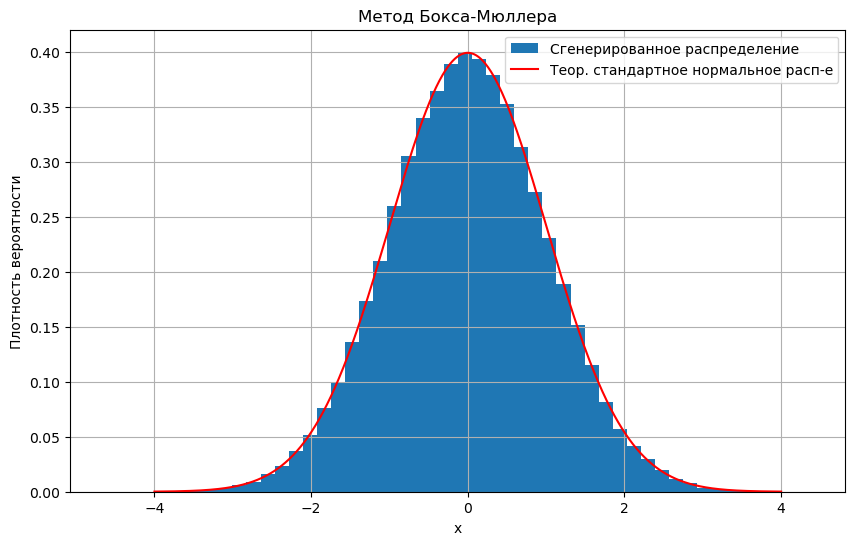

In [115]:
size = 100000
data = box_muller(size)

t_stat, p_value_t = t_test(data, expected_mean=0)
print(f"t-критерий Стьюдента: t-статистика = {t_stat:.4f}, p-значение = {p_value_t:.4f}")

group1, group2 = np.split(data, 2)

f_stat, p_value_f = f_test(group1, group2)
print(f"критерий Фишера: F-статистика = {f_stat:.4f}, p-значение = {p_value_f:.4f}")

x = np.linspace(-4, 4, 1000)
pdf = 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, label="Сгенерированное распределение")
plt.plot(x, pdf, label="Теор. стандартное нормальное расп-е", color='red')
plt.title("Метод Бокса-Мюллера")
plt.xlabel("x")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

# 4

Условие
1. Построить датчик распределения Коши.
2. На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи графика normal probability plot убедиться в корректности построенного датчика и
обосновать наблюдаемую линейную зависимость.
3. Сравнить скорость моделирования стандартного нормального распределения в
задании 3 и в задании 4.

## 4.1

Построить датчик распределения Коши.

1. Плотность вероятности распределения Коши:

   Распределение Коши с параметрами $ x_0 $ (местоположение) и $ \gamma $ (масштаб) имеет плотность вероятности:

   $$
   f(x) = \frac{1}{\pi \gamma \left( 1 + \left( \frac{x - x_0}{\gamma} \right)^2 \right)}
   $$

2. Метод обратной трансформации:

   Если $ U $ — случайная величина, равномерно распределённая на интервале $ [0, 1] $, то для стандартного распределения Коши $(x_0 = 0 $, $ \gamma = 1 $):

   $$
   X = \tan\left( \pi \left( U - \frac{1}{2} \right) \right)
   $$

3. Масштабирование и сдвиг:

   Для получения выборки с произвольными параметрами $ x_0 $ и $ \gamma $:

   $$
   X = x_0 + \gamma \cdot \tan\left( \pi \left( U - \frac{1}{2} \right) \right)
   $$

   Где:
   - $ U $ — равномерно распределённая случайная величина на интервале $ [0, 1] $,
   - $ X $ — случайная величина с распределением Коши с параметрами $ x_0 $ и $ \gamma $.


In [116]:
def cauchy_sample(size, x0=0, gamma=1):
    u = np.random.uniform(low=0.0, high=1.0, size=size)
    cauchy_sample = np.tan(np.pi * (u - 0.5))
    cauchy_sample = x0 + gamma * cauchy_sample
    
    return cauchy_sample

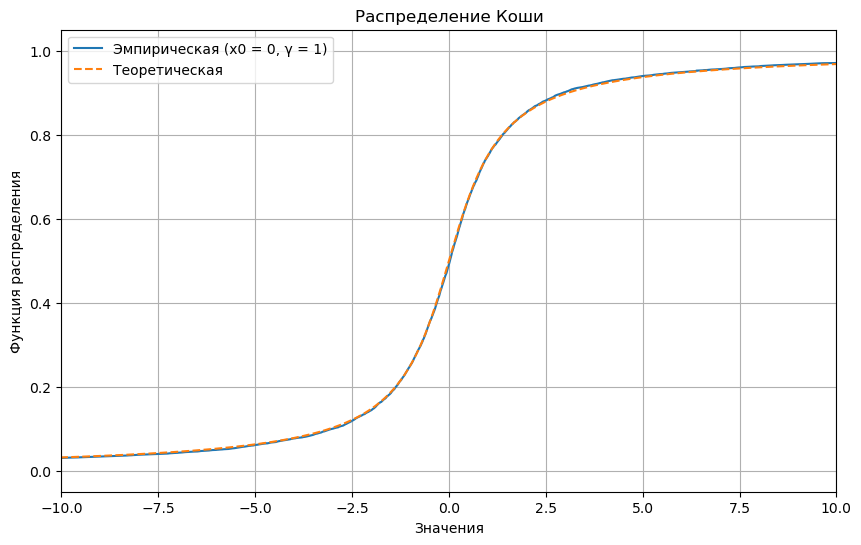

In [117]:
size = 10000
x0 = 0
gamma = 1

sample = cauchy_sample(size, x0, gamma)
sample_sorted = np.sort(sample)

y1 = np.arange(1, size + 1) / size
y2 = (1 / np.pi) * np.arctan((sample_sorted - x0) / gamma) + 1/2

plt.figure(figsize=(10, 6))
plt.plot(sample_sorted, y1, label=f'Эмпирическая (x0 = {x0}, γ = {gamma})')
plt.plot(sample_sorted, y2, '--', label='Теоретическая')
plt.xlabel('Значения')
plt.ylabel('Функция распределения')
plt.title('Распределение Коши')
plt.legend()
plt.xlim([-10,10])
plt.grid(True)
plt.show()


## 4.2

На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи графика normal probability plot убедиться в корректности построенного датчика и обосновать наблюдаемую линейную зависимость.

Метод фон Неймана (или rejection sampling) заключается в том, что если мы хотим сгенерировать выборку из распределения $ P(x) $, но можем только сгенерировать выборки из другого распределения $ Q(x) $, то для каждой случайной выборки из $ Q(x) $ мы генерируем значение случайной величины и принимаем его, если оно удовлетворяет неравенству:

$$
U \leq \frac{P(x)}{M Q(x)},
$$
где $ U $ — это случайная величина из равномерного распределения $ U(0, 1) $, а $ M $ — такая константа, что $ M \cdot Q(x) $ "покрывает" $ P(x) $ для всех $ x $. $ Q(x) $ — это распределение Коши (которое мы будем генерировать с помощью метода фон Неймана). $ P(x) $ — это стандартное нормальное распределение.


Теоретическое распределение Коши: 
$$
f_C(x) = \frac{1}{\pi(1 + x^2)}
$$
Нормальное распределение: 
$$
f_N(x) = \frac{e^\frac{-x^2}{2}}{\sqrt(2\pi)}
$$

In [118]:
def rejection_sampling_normal(size):
    samples = []
    
    M = np.sqrt(2 * np.pi)
    
    while len(samples) < size:
        x = cauchy_sample(1)[0]
        u = np.random.uniform(0, 1)
        
        if u <= np.exp(-0.5 * x**2) / (M * (1 / (np.pi * (1 + x**2)))):
            samples.append(x)
    
    return np.array(samples)

Normal Probability Plot — это график, на котором отображаются квантили выборки (по оси $y$) против квантилей теоретического нормального распределения (по оси $x$). Если выборка распределена нормально, точки на графике будут лежать на прямой линии.


Для выборки из $ N(\mu, \sigma^2) $ нормальная вероятность будет линейной, но с наклоном и сдвигом. Наклон будет зависеть от $ \sigma $, а сдвиг — от $ \mu $.


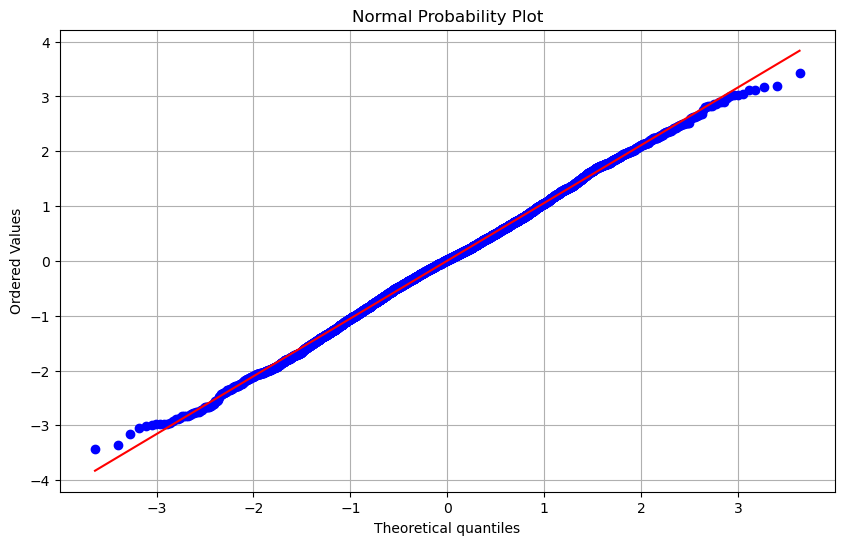

In [119]:
size = 5000
sample_normal = rejection_sampling_normal(size)

plt.figure(figsize=(10, 6))
stats.probplot(sample_normal, plot=plt)
plt.title('Normal Probability Plot')
plt.grid(True)
plt.show()

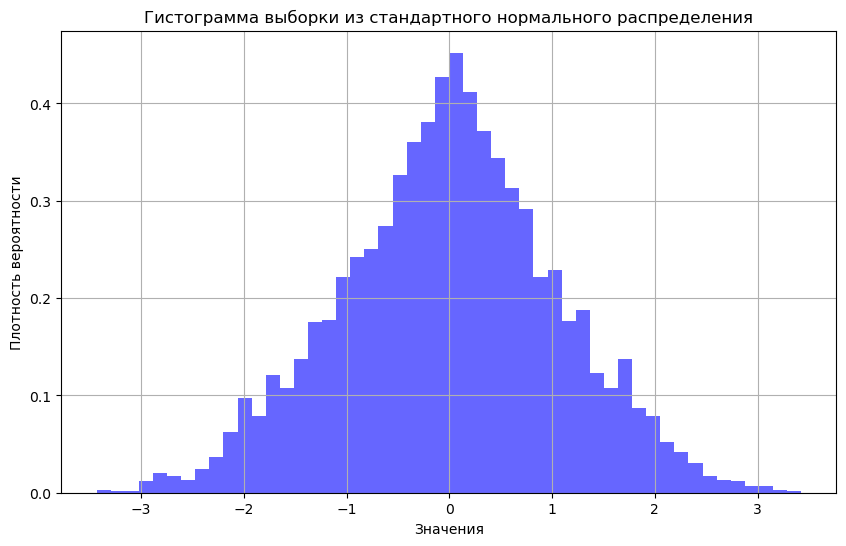

In [120]:
# гистограмма
plt.figure(figsize=(10, 6))
plt.hist(sample_normal, bins=50, density=True, alpha=0.6, color='b')
plt.title('Гистограмма выборки из стандартного нормального распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

## 4.3

Сравнить скорость моделирования стандартного нормального распределения в задании 3 и в задании 4.

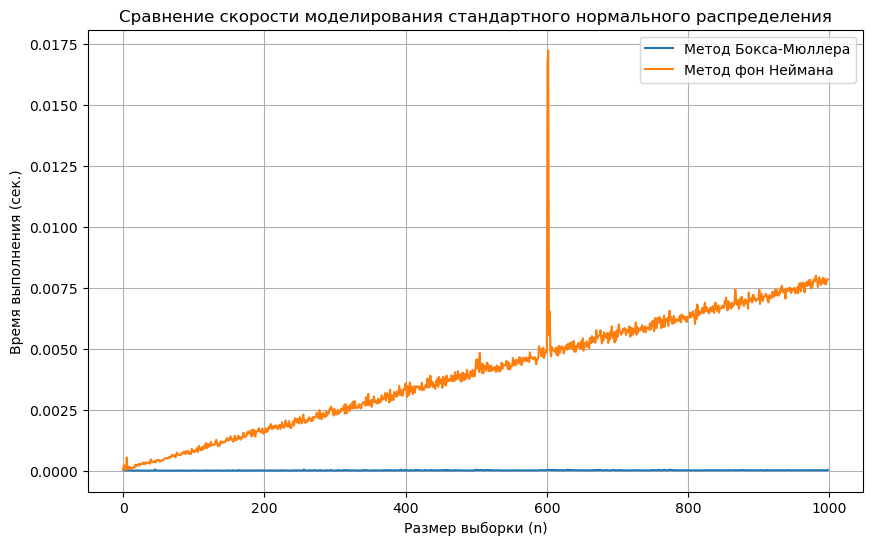

In [121]:
n = 1000
box_muller_t = []
rejection_t = []

for size in range(1, n):
    start_time = time.time()
    box_muller(size)
    box_muller_t.append(time.time() - start_time)
    
    start_time = time.time()
    rejection_sampling_normal(size)
    rejection_t.append(time.time() - start_time)

plt.figure(figsize=(10, 6))
plt.plot(box_muller_t, label='Метод Бокса-Мюллера')
plt.plot(rejection_t, label='Метод фон Неймана')

plt.xlabel('Размер выборки (n)')
plt.ylabel('Время выполнения (сек.)')
plt.title('Сравнение скорости моделирования стандартного нормального распределения')
plt.legend()
plt.grid(True)
plt.show()

Очевидно, метод Бокса-Мюллера работает быстрее, что особенно заметно при увеличении значения $n$.

# 5

1. Пусть $X_i \sim N(\mu, \sigma^2).$ Убедиться эмпирически в справедливости теоремы о законе больших чисел (ЗБЧ) и центральной предельной теоремы (ЦПТ): исследовать поведение суммы $S_n = \sum_{i=1}^n X_i$ и эмпирического распределения величины
$$
\sqrt{n} ( \frac{S_n}{n} - a). 
$$
2. Считая $\mu$ и $\sigma^2$ неизвестными, построить доверительные интервалы для среднего и дисперсии по имеющейся выборке.  
3. Пусть $X_i \sim K(a,b)$ — имеет распределение Коши с параметром сдвига $a$ и масштаба $b$. Изучить эмпирически как ведут себя суммы $S_n/n$, объяснить результат и найти закон распределения данных сумм.

## 5.1

Пусть $X_i \sim N(\mu, \sigma^2).$ Убедиться эмпирически в справедливости теоремы о законе больших чисел (ЗБЧ) и центральной предельной теоремы (ЦПТ): исследовать поведение суммы $S_n = \sum_{i=1}^n X_i$ и эмпирического распределения величины
$$
\sqrt{n} ( \frac{S_n}{n} - a). 
$$

ЗБЧ утверждает, что для последовательности независимых и одинаково распределённых случайных величин $ X_1, X_2, \dots, X_n $, математическое ожидание выборочного среднего сходится к истинному среднему $ \mu $ при $ n \to \infty $:
$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i \xrightarrow{n \to \infty} \mu.
$$

Накопленное выборочное среднее вычисляется как:
$$
S_k = \frac{1}{k} \sum_{i=1}^k X_i
$$


In [122]:
from scipy.special import erf
from scipy.stats import t, chi2


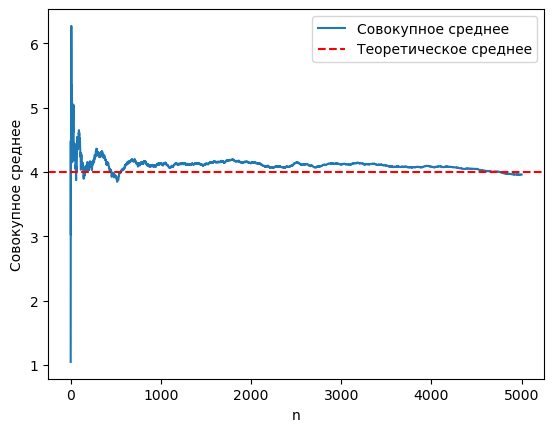

In [123]:
# ЗБЧ
mu = 4
sigma = 5

n = 5000
X = mu + sigma * box_muller(n)
cumulative_mean = np.cumsum(X) / np.arange(1, n + 1)

plt.figure()
plt.plot(cumulative_mean, label='Совокупное среднее')
plt.axhline(mu, color='red', linestyle='--', label='Теоретическое среднее')
plt.xlabel('n')
plt.ylabel('Совокупное среднее')
plt.legend()

ЦПТ утверждает, что сумма независимых случайных величин $ S_n = \sum_{i=1}^n X_i $, нормализованная с помощью $\sqrt{n}$, приближается к стандартному нормальному распределению $ N(0, 1) $ при $ n \to \infty $:
$$
Z_n = \sqrt{n} \left( \frac{S_n}{n} - \mu \right) \xrightarrow{n \to \infty} N(0, 1).
$$
В коде:
1. Вычисляется нормализованная величина:
$$
    Z_n = \sqrt{n} \left( \frac{\overline{X}_n}{n} - \mu \right).
$$
3. Эмпирическая функция распределения строится как:
$$
F_{\text{emp}}(x) = \frac{i}{\text{n\_tries}}, \quad i = 1, 2, \dots, \text{n\_tries}
$$
4. Теоретическая функция распределения:
$$
F(x) = \frac{1}{2} \left( 1 + \text{erf}\left( \frac{x}{\sqrt{2}} \right) \right)
$$
где $\text{erf}$ — функция ошибок.

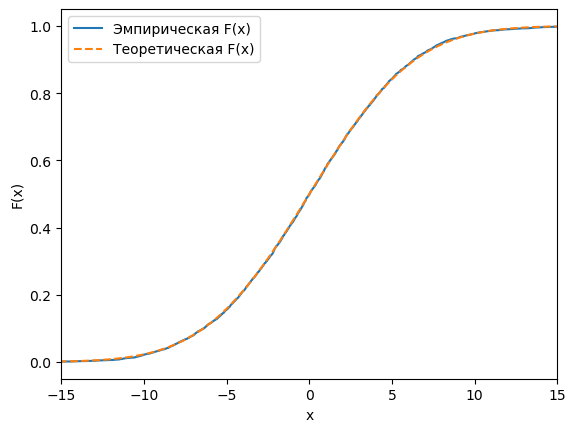

In [124]:
# ЦПТ
n_tries = 5000
n = 5000
X = (mu + sigma * box_muller(n * n_tries)).reshape(n_tries, n)
z = np.sqrt(n) * (np.mean(X, axis=1) - mu)
z.sort()

cdf = lambda x: 0.5 * (1 + erf(x / np.sqrt(2)))
y_th = cdf(z / sigma)

y_pr = np.arange(1, n_tries + 1) / n_tries

plt.figure()
plt.plot(z, y_pr, label='Эмпирическая F(x)')
plt.plot(z, y_th, '--', label='Теоретическая F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.xlim([-3 * sigma, 3 * sigma])
plt.legend()

## 5.2

Считая $\mu$ и $\sigma^2$ неизвестными, построить доверительные интервалы для среднего и дисперсии по имеющейся выборке.  

1. Доверительный интервал для среднего

Для выборки $X_1, X_2, \dots, X_n \sim N(\mu, \sigma^2)$ — независимых случайных величин из нормального распределения, доверительный интервал для среднего $\mu$ вычисляется как:
$$
\mu \in \left( \overline{X} - t_{n-1, 1-\frac{\alpha}{2}} \cdot \frac{S}{\sqrt{n}}, \; \overline{X} + t_{n-1, 1-\frac{\alpha}{2}} \cdot \frac{S}{\sqrt{n}} \right),
$$
где:
- $\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$ — выборочное среднее;
- $S = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})^2}$ — выборочное стандартное отклонение;
- $t_{n-1, 1-\frac{\alpha}{2}}$ — квантиль распределения Стьюдента с $n-1$ степенями свободы;
- $n$ — размер выборки;
- $\alpha$ — уровень значимости.

Этот интервал показывает диапазон, в котором с вероятностью $1 - \alpha$ находится истинное значение $\mu$.

2. Доверительный интервал для дисперсии

Используя теорему Фишера, можно построить доверительный интервал для дисперсии $\sigma^2$. Теорема гласит:

Пусть $X_1, X_2, \dots, X_n \sim N(\mu, \sigma^2)$ — независимая выборка, тогда случайная величина:
$$
H = \frac{(n - 1)S^2}{\sigma^2}
$$
имеет распределение $\chi^2$ с $n - 1$ степенями свободы.

На основании этого можно записать:
$$
P\left(\chi^2_{n-1, \frac{\alpha}{2}} \leqslant \frac{(n-1)S^2}{\sigma^2} \leqslant \chi^2_{n-1, 1-\frac{\alpha}{2}}\right) = 1 - \alpha.
$$

Решая это неравенство относительно $\sigma^2$, получаем доверительный интервал:
$$
\sigma^2 \in \left( \frac{(n-1)S^2}{\chi^2_{n-1, 1-\frac{\alpha}{2}}}, \; \frac{(n-1)S^2}{\chi^2_{n-1, \frac{\alpha}{2}}} \right),
$$
где:
- $(n-1)S^2 = \sum_{i=1}^n (X_i - \overline{X})^2$ — несмещённая оценка дисперсии;
- $\chi^2_{n-1, p}$ — квантиль распределения $\chi^2$ с $n-1$ степенями свободы.



In [125]:
n_samples = 50000
alpha = 0.05
mu = 3
sigma = 2

sample_data = mu + sigma * np.random.randn(n_samples)

# доверительный интервал среднего
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
t_critical = stats.t.ppf(1 - alpha / 2, df=n_samples - 1)
mean_margin = t_critical * sample_std / np.sqrt(n_samples)
mean_interval = (
    sample_mean - mean_margin,
    sample_mean + mean_margin
)
print(f"Доверительный интервал для среднего: {mean_interval}")

# доверительный интервал дисперсии
sample_variance = np.var(sample_data, ddof=1)
chi2_lower = stats.chi2.ppf(alpha / 2, df=n_samples - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n_samples - 1)
variance_interval = (
    (n_samples - 1) * sample_variance / chi2_upper,
    (n_samples - 1) * sample_variance / chi2_lower
)
print(f"Доверительный интервал для дисперсии: {variance_interval}")


Доверительный интервал для среднего: (2.991201089565335, 3.0263601880391837)
Доверительный интервал для дисперсии: (3.9728448102536524, 4.072571864987737)


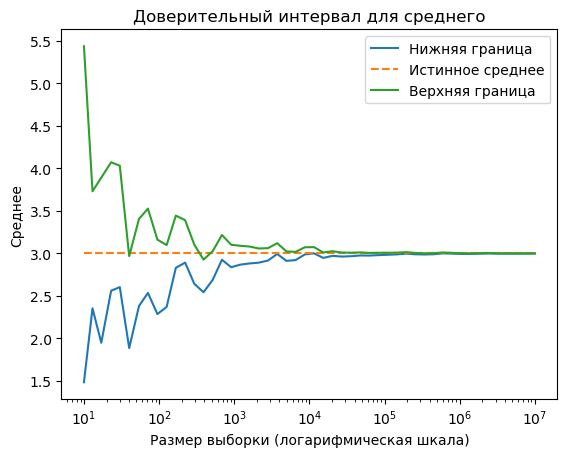

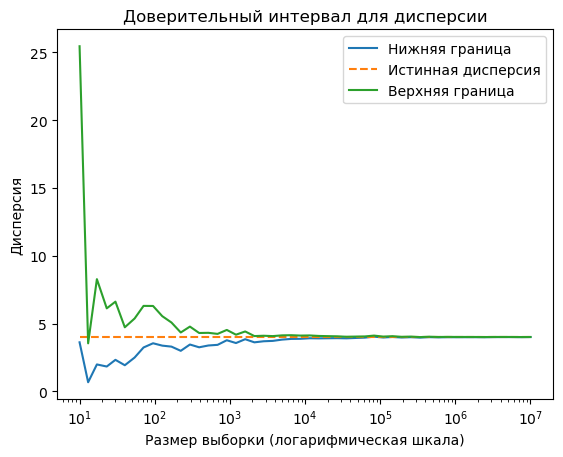

In [126]:
sample_sizes = np.logspace(1, 7, 50, dtype=int)
mean_intervals = []
variance_intervals = []

for size in sample_sizes:
    data = mu + sigma * np.random.randn(size)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    variance = np.var(data, ddof=1)

    t_critical = t.ppf(1 - alpha / 2, df=size - 1)
    margin = t_critical * std_dev / np.sqrt(size)
    mean_intervals.append((mean - margin, mean + margin))

    chi2_lower = stats.chi2.ppf(alpha / 2, df=size - 1)
    chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=size - 1)
    lower_var = (size - 1) * variance / chi2_upper
    upper_var = (size - 1) * variance / chi2_lower
    variance_intervals.append((lower_var, upper_var))

mean_left = [i[0] for i in mean_intervals]
mean_right = [i[1] for i in mean_intervals]

plt.figure()
plt.plot(sample_sizes, mean_left, label='Нижняя граница')
plt.plot(sample_sizes, [mu] * len(sample_sizes), label='Истинное cреднее', linestyle='--')
plt.plot(sample_sizes, mean_right, label='Верхняя граница')
plt.xscale('log')
plt.xlabel('Размер выборки (логарифмическая шкала)')
plt.ylabel('Среднее')
plt.legend()
plt.title('Доверительный интервал для среднего')
plt.show()

var_left = [i[0] for i in variance_intervals]
var_right = [i[1] for i in variance_intervals]

plt.figure()
plt.plot(sample_sizes, var_left, label='Нижняя граница')
plt.plot(sample_sizes, [sigma**2] * len(sample_sizes), label='Истинная дисперсия', linestyle='--')
plt.plot(sample_sizes, var_right, label='Верхняя граница')
plt.xscale('log')
plt.xlabel('Размер выборки (логарифмическая шкала)')
plt.ylabel('Дисперсия')
plt.legend()
plt.title('Доверительный интервал для дисперсии')
plt.show()

## 5.3

Пусть $X_i \sim K(a,b)$ — имеет распределение Коши с параметром сдвига $a$ и масштаба $b$. Изучить эмпирически как ведут себя суммы $S_n/n$, объяснить результат и найти закон распределения данных сумм.

Рассмотрим случайные величины $X_i \sim K(a, b)$, которые имеют распределение Коши с параметром сдвига $a$ и масштаба $b$. Их плотность вероятности задаётся формулой:

$$
f(x; a, b) = \frac{1}{\pi b \left(1 + \left(\frac{x - a}{b}\right)^2\right)}, \quad x \in \mathbb{R},
$$
где $a \in \mathbb{R}$ — параметр сдвига, $b > 0$ — параметр масштаба.

Сумма случайных величин и поведение $S_n / n$. Пусть 
$$
S_n = \sum_{i=1}^n X_i,
$$
тогда
$$
\frac{S_n}{n} = \frac{\sum_{i=1}^n X_i}{n}.
$$

Эмпирическое поведение
- Центральная предельная теорема (ЦПТ) не применима, так как у распределения Коши нет конечного математического ожидания.
- Вместо этого, распределение средних $\frac{S_n}{n}$ остаётся распределением Коши:
  $$
  \frac{S_n}{n} \sim K(a, b).
  $$

1. Для каждого $n$, сумма $S_n$ имеет такое же распределение Коши, как и отдельные члены суммы $X_i$, из-за свойства замкнутости распределения Коши относительно сумм.
2. Деление на $n$ масштабирует сумму, но распределение сохраняет те же параметры $a$ и $b$.


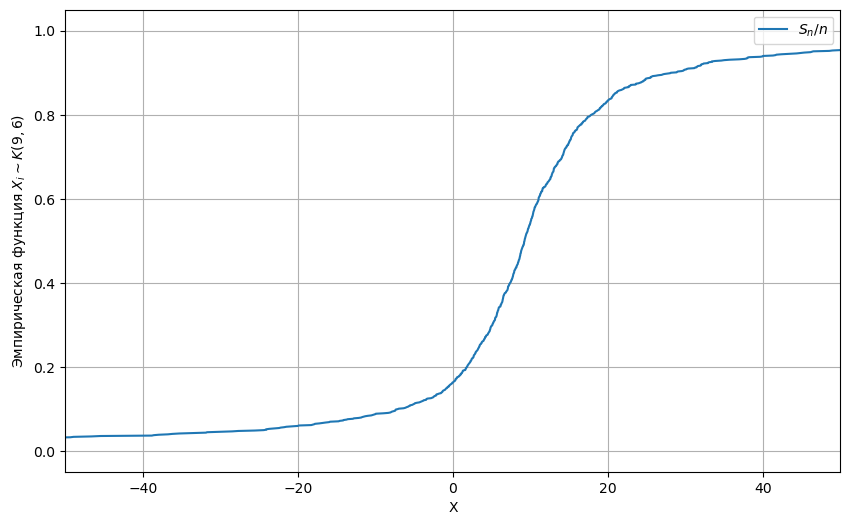

In [127]:
a, b = 9, 6
n = 1000 

Sn = []
for _ in range(n):
    sample = cauchy_sample(size=n, x0=a, gamma=b) 
    Sn.append(np.sum(sample) / n) 

Sn = np.sort(Sn)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Sn, np.arange(1, n + 1) / n, label=f'$S_n / n$')
ax.set_xlabel('X')
ax.set_ylabel(f'Эмпирическая функция $X_i \\sim K({a}, {b})$')
plt.xlim([-50, 50])
plt.legend()
plt.grid()
plt.show()


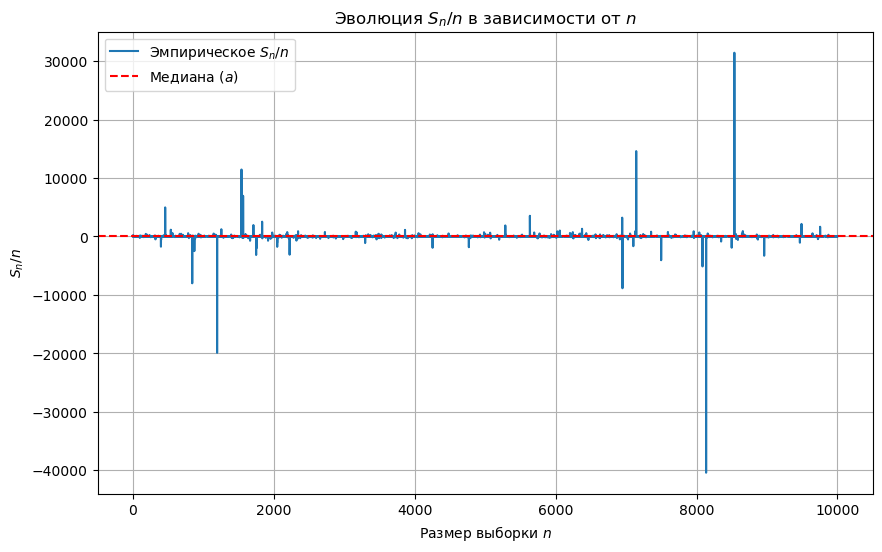

In [128]:
sample_sizes = np.arange(1, max_n + 1)
S_n = []

for n in sample_sizes:
    samples = cauchy_sample(size=n, x0=a, gamma=b)
    S_n.append(np.sum(samples) / n)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, S_n, label="Эмпирическое $S_n / n$")
plt.axhline(y=a, color='red', linestyle='--', label="Медиана ($a$)")
plt.title('Эволюция $S_n / n$ в зависимости от $n$')
plt.xlabel('Размер выборки $n$')
plt.ylabel('$S_n / n$')
plt.legend()
plt.grid()
plt.show()

# 6

Вычислить следующий интеграл:

$$
\int_{-\infty}^\infty \int_{-\infty}^\infty \dots \int_{-\infty}^\infty 
\frac{e^{-\left(x_1^2 + \dots + x_{10}^2 + \frac{1}{27} \cdot x_1^2 \cdots x_{10}^2\right)}}{x_1^2 \cdots x_{10}^2} \, dx_1 dx_2 \dots dx_{10}
$$

1. Методом Монте-Карло

2. Методом квадратур, сводя задачу к вычислению собственного интеграла Римана.

3. Оценить точность вычислений для каждого из двух случаев.


## 6.2 Методом квадратур, сводя задачу к вычислению собственного интеграла Римана.

Метод квадратур заключается в приближении интеграла через взвешенную сумму значений функции $f(x)$ в заранее заданных узлах:

$$
I = \int_a^b f(x) \, dx \approx \sum_{i=1}^N w_i f(x_i),
$$

где:
- $x_i$ — узлы (точки разбиения области интегрирования),
- $w_i$ — веса, зависящие от выбранного метода (например, трапеций, Симпсона или Гаусса).

Заменяем $f(x)$ на аппроксимирующий полином $P(x)$, который интерполирует функцию в узлах $x_i$. А интеграл от $P(x)$ вычисляется точно и служит приближением для $f(x)$.


In [133]:
def f(x):
    tg = np.power(np.tan(np.pi / 2 * x), 2)
    cos_squared = np.prod(np.power(np.cos(np.pi / 2 * x), 2), axis=0)
    cos_squared = np.maximum(cos_squared, 1e-12)  # Избегаем деления на 0
    product = np.prod(tg, axis=0)
    product = np.maximum(product, 1e-12)  # Избегаем неопределённостей
    return np.power(np.pi, 10) * np.exp(-np.sum(tg, axis=0) - 1 / (2**7 * product)) / cos_squared

n = 3
k = 10

grid = [np.linspace(1, 2 * n - 1, n) / (2 * n)] * k
points = np.array(np.meshgrid(*grid)).T.reshape(-1, k)
I_quad = (np.apply_along_axis(f, 1, points) / np.power(n, k)).sum() * np.pi**10

print(f"Значение интеграла методом квадратур: {I_quad}")

Значение интеграла методом квадратур: 216428.80340600153


## 6.1 Методом Монте-Карло

Метод Монте-Карло основан на использовании случайных выборок для оценки значения интеграла. Рассмотрим многомерный интеграл:

$$
I = \int_{\Omega} f(x) \, dx,
$$

где $\Omega$ — область интегрирования, $f(x)$ — подынтегральная функция.

Метод Монте-Карло приближает интеграл как среднее значение функции $f(x)$, взятое по случайным точкам $x_i$, равномерно распределённым в $\Omega$:

$$
I \approx \overline{I}_n = \frac{1}{n} \sum_{i=1}^n f(x_i),
$$

где:
- $x_i \in \Omega$ — случайные точки,
- $n$ — количество выборок.


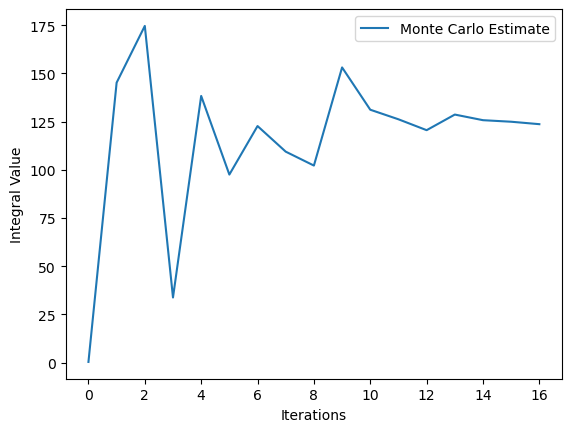

Финальный результат метода Монте-Карло: 123.67804239998141


In [134]:
k = 10
n = 1000000
I_monte_carlo = []
mu = [0] * k

i = 10
while i < n:
    i *= 2
    ksi = np.random.multivariate_normal(mu, np.eye(k) / 2, i)
    product = np.prod(ksi**2, axis=1)
    exp_term = np.sum(ksi**2, axis=1) + (1/27) * product
    values = np.pi**5 * np.exp(-1/(2**7 * product)) / product
    estimate = np.sum(values) / i
    I_monte_carlo.append(estimate)

plt.plot(range(len(I_monte_carlo)), I_monte_carlo, label='Monte Carlo Estimate')
plt.xlabel('Iterations')
plt.ylabel('Integral Value')
plt.legend()
plt.show()

final_monte_carlo_result = I_monte_carlo[-1]
print(f"Финальный результат метода Монте-Карло: {final_monte_carlo_result}")

## 6.3 Оценка

1. Метод квадратур

Погрешность метода квадратур можно оценить с использованием формулы для метода трапеций:

$$
E_{quad} = \sum_{i=1}^{k} \frac{\max_{x_i \in [0, 1]} |f''(x_i)|}{24} h^3,
$$

где:
- $k$ — размерность интеграла,
- $h = \frac{1}{N}$ — шаг разбиения,
- $\max_{x_i \in [0, 1]} |f''(x_i)|$ — максимум второй производной функции $f(x)$.

Погрешность зависит от точности аппроксимации функции $f(x)$ квадратичным полиномом, что ограничено значением второй производной.

2. Метод Монте-Карло

Для метода Монте-Карло погрешность определяется через центральную предельную теорему:

$$
P\left(|\overline{I} - I| \leq \varepsilon \right) = 1 - \alpha,
$$

где:
- $\overline{I}$ — оценка интеграла по выборке,
- $I$ — истинное значение интеграла,
- $\alpha$ — уровень значимости.

Итоговая погрешность вычисляется по формуле:

$$
\varepsilon = \frac{\sigma_n}{\sqrt{n}} K_{1 - \frac{\alpha}{2}},
$$

где:
- $\sigma_n^2 = \frac{1}{n} \sum_{i=1}^n \left(f(x_i) - \overline{f(x)}\right)^2$ — выборочная дисперсия,
- $n$ — число выборок,
- $K_{1 - \frac{\alpha}{2}}$ — квантиль стандартного нормального распределения.